# HM: compare score of differently ensembled tree

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification
import sklearn.datasets as sd
import sklearn.model_selection as sm
import graphviz

In [25]:
test_dat_path = '../datasets/test_add_forest.dat'

In [26]:
f = open(test_dat_path, 'r')

X = []
y = []

for line in f:
    cols = line.split()
    if cols:
        X.append([cols[0], cols[1], cols[2], cols[3], cols[4], cols[5], cols[6], cols[7], cols[8], cols[9]])
        y.append(cols[10])

In [27]:
AdaBoost_tree = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=2), n_estimators=2)

AdaBoost_tree.fit(X, y)
AdaBoost_score = AdaBoost_tree.score(X, y)
AdaBoost_score

0.7684931506849315

In [20]:
stacking_tree = StackingClassifier(estimators=[('t1', tree.DecisionTreeClassifier(max_depth=2)),
                                              ('t2', tree.DecisionTreeClassifier(max_depth=2))],
                                  final_estimator=tree.DecisionTreeClassifier(max_depth=2))

stacking_tree = stacking_tree.fit(X, y)
stacking_tree_score = stacking_tree.score(X, y)
stacking_tree_score

0.6666666666666666

In [21]:
bagging_tree = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=2), n_estimators=2)
bagging_tree = bagging_tree.fit(X, y)

bagging_tree_score = bagging_tree.score(X, y)
bagging_tree_score

0.7397260273972602

In [22]:
tree = tree.DecisionTreeClassifier(max_depth=2)
tree = tree.fit(X, y)

tree_score = tree.score(X, y)
tree_score

0.6719178082191781

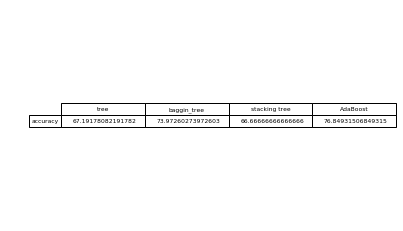

<Figure size 1800x1500 with 0 Axes>

In [56]:
data = np.array([[tree_score, bagging_tree_score, stacking_tree_score, AdaBoost_score]]) * 100
columns = ['tree', 'baggin_tree', 'stacking tree', 'AdaBoost']

df=pd.DataFrame(data,columns=columns)

# print(data)
fig, ax = plt.subplots(1, 1)
plt.figure(figsize=(12, 10), dpi=150)
ax.axis('off')
ax.axis('tight')


ax.table(cellText=df.values,colLabels=df.columns,rowLabels=['accuracy'],loc="center")
plt.show()